<a href="https://colab.research.google.com/github/Harshi86/WEEK-2-/blob/main/tree_species1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/'))




['Getting started.pdf', 'Epson iPrint', 'New Piratedrive', 'L$289380115$25072024.pdf', 'MALEPATI HARSHINI Offer Letter Next24tech.pdf', 'MALEPATI HARSHINI Internship Certificate Next24tech.jpg', 'IMG-20241125-WA0185.jpg', 'Screenshot_20241128_175507_WhatsApp.jpg', '1. Stack.ipynb', 'boardingpass_B3QZ9Y_SXRDEL.pdf', '23ETAI410022 Indian Constitution.pdf', 'Colab Notebooks']


In [4]:
import os
print(os.listdir('/content/drive/MyDrive/'))

['Colab Notebooks', 'Getting started.pdf', 'Epson iPrint', 'New Piratedrive', 'L$289380115$25072024.pdf', 'MALEPATI HARSHINI Offer Letter Next24tech.pdf', 'MALEPATI HARSHINI Internship Certificate Next24tech.jpg', 'IMG-20241125-WA0185.jpg', 'Screenshot_20241128_175507_WhatsApp.jpg', '1. Stack.ipynb', 'boardingpass_B3QZ9Y_SXRDEL.pdf', '23ETAI410022 Indian Constitution.pdf', 'Tree_Species_Dataset']


In [ ]:
import os

# Corrected path to access the directory in Google Drive
repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"
print("Contents:", os.listdir(repo_path))

Contents: ['Tree_Species_Dataset']


In [11]:
# Construct the path to the subdirectory containing the class directories
# Assuming the actual dataset is in the first subdirectory listed
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)

    # List the contents of the subdirectory and filter for directories
    class_dirs = [d for d in os.listdir(subdirectory_path) if os.path.isdir(os.path.join(subdirectory_path, d)) and not d.startswith('.')]

    print(f"Number of classes: {len(class_dirs)}")
    print(f"Class names: {class_dirs}")
else:
    print("No subdirectories found in the repository path.")

Number of classes: 30
Class names: ['amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [13]:
import glob

image_paths = []
labels = []

# Construct the path to the subdirectory containing the class directories
# Assuming the actual dataset is in the first subdirectory listed
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)

    # Iterate through the actual class directories within the subdirectory
    for class_name in os.listdir(subdirectory_path):
        class_folder = os.path.join(subdirectory_path, class_name)
        if os.path.isdir(class_folder) and not class_name.startswith('.'):
            for img_file in os.listdir(class_folder):
                # Construct the full image path
                img_path = os.path.join(class_folder, img_file)
                # Add the image path and label to the lists
                image_paths.append(img_path)
                labels.append(class_name)


print(f"Total images: {len(image_paths)}")

Total images: 582


In [14]:
import pandas as pd

# Construct the path to the subdirectory containing the class directories
# Assuming the actual dataset is in the first subdirectory listed
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)

    class_counts = {cls: len(os.listdir(os.path.join(subdirectory_path, cls))) for cls in class_dirs}
    class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
    print(class_counts_df.sort_values('Image Count', ascending=False).head())
    print("shape: ",class_counts_df.shape)
else:
    print("No subdirectories found in the repository path.")

            Image Count
other               150
saptaparni           60
simlo                54
shirish              53
pilikaren            50
shape:  (30, 1)


In [15]:
!git clone https://github.com/kailas93/Tree-Species-Identification.git

Cloning into 'Tree-Species-Identification'...
fatal: could not read Username for 'https://github.com': No such device or address


In [16]:
import os

cloned_repo_path = "Tree-Species-Identification"  # Assuming the repository is cloned to this directory name
print(os.listdir(cloned_repo_path))

FileNotFoundError: [Errno 2] No such file or directory: 'Tree-Species-Identification'

Skipping empty or non-existent directory: amla
Skipping empty or non-existent directory: bamboo
Skipping empty or non-existent directory: banyan


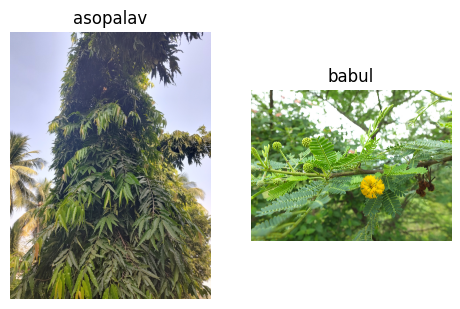

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    # Construct the path to the subdirectory containing the class directories
    # Assuming the actual dataset is in the first subdirectory listed
    sub_dirs = os.listdir(repo_path)
    if sub_dirs:
        subdirectory_name = sub_dirs[0]
        subdirectory_path = os.path.join(repo_path, subdirectory_name)
        for i, class_dir in enumerate(class_dirs[:n]):
            class_folder_path = os.path.join(subdirectory_path, class_dir)
            if os.path.isdir(class_folder_path) and os.listdir(class_folder_path): # Check if directory exists and is not empty
                img_file = os.listdir(class_folder_path)[0]
                img_path = os.path.join(class_folder_path, img_file)
                img = Image.open(img_path)
                plt.subplot(1, n, i+1)
                plt.imshow(img)
                plt.title(class_dir)
                plt.axis('off')
            else:
                print(f"Skipping empty or non-existent directory: {class_dir}")
        plt.show()
    else:
        print("No subdirectories found in the repository path.")


show_sample_images(repo_path, class_dirs)

In [26]:
image_data = []

# Construct the path to the subdirectory containing the class directories
# Assuming the actual dataset is in the first subdirectory listed
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)

    for class_dir in class_dirs:
        class_folder_path = os.path.join(subdirectory_path, class_dir)
        if os.path.isdir(class_folder_path): # Check if the path is a directory
            for img_file in os.listdir(class_folder_path):
                img_path = os.path.join(class_folder_path, img_file)
                try:
                    img = Image.open(img_path)
                    image_data.append({'path': img_path, 'Width': img.size[0], 'Height': img.size[1]})
                except Exception as e:
                    print(f"Could not open image {img_path}: {e}")


# DataFrame and Summary
import pandas as pd

if image_data:
    shapes_df = pd.DataFrame(image_data)
    display(shapes_df.head())
    display(shapes_df.describe())
else:
    print("No image data was collected.")

,path,Width,Height
0,/content/drive/MyDrive/Tree_Species_Dataset/Tr...,270,187
1,/content/drive/MyDrive/Tree_Species_Dataset/Tr...,214,235
2,/content/drive/MyDrive/Tree_Species_Dataset/Tr...,259,194
3,/content/drive/MyDrive/Tree_Species_Dataset/Tr...,183,275
4,/content/drive/MyDrive/Tree_Species_Dataset/Tr...,259,194


,Width,Height
count,1617.000000,1617.000000
mean,311.743352,269.369202
std,294.809458,276.610995
min,141.000000,128.000000
25%,225.000000,183.000000
50%,259.000000,200.000000
75%,275.000000,259.000000
max,4000.000000,4032.000000


In [23]:
corrupt_images = []

# Construct the path to the subdirectory containing the class directories
# Assuming the actual dataset is in the first subdirectory listed
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)

    for class_dir in class_dirs:
        class_folder_path = os.path.join(subdirectory_path, class_dir)
        if os.path.isdir(class_folder_path): # Check if the path is a directory
            for img_file in os.listdir(class_folder_path):
                img_path = os.path.join(class_folder_path, img_file)
                try:
                    img = Image.open(img_path)
                    img.verify()
                except Exception as e:
                    corrupt_images.append(img_path)
                    print(f"Corrupt image found: {img_path} - {e}")


print("Corrupted images found:", len(corrupt_images))

Corrupted images found: 0


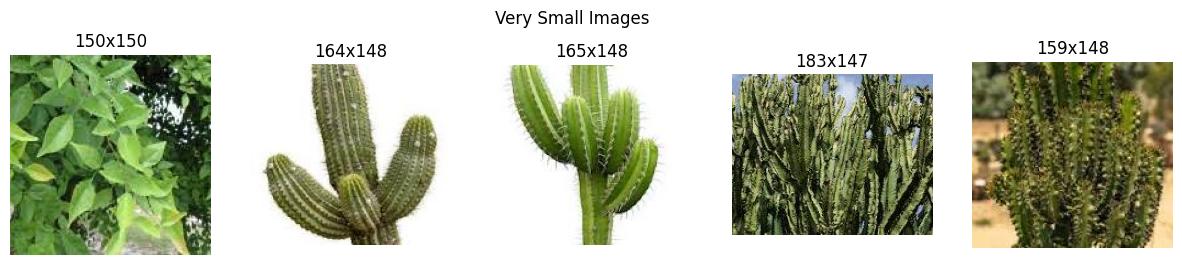

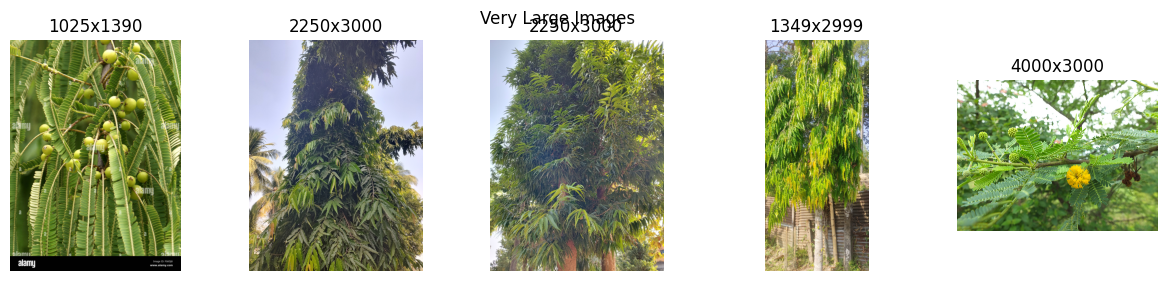

In [27]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd # Import pandas here as well if not already imported

def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['Width']}x{row['Height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Define small and large images based on size (example thresholds)
small_threshold = 200*200  # Example: images with area less than 40000 pixels
large_threshold = 1000*1000 # Example: images with area greater than 1000000 pixels

shapes_df['area'] = shapes_df['Width'] * shapes_df['Height']

small_imgs = shapes_df[shapes_df['area'] < small_threshold]
large_imgs = shapes_df[shapes_df['area'] > large_threshold]

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [28]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 55 outlier images (small + large).


In [30]:
# Recalculate sizes
image_info = []

# Construct the path to the subdirectory containing the class directories
# Assuming the actual dataset is in the first subdirectory listed
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)

    for class_dir in os.listdir(subdirectory_path): # Iterate through actual directories in the subdirectory
        class_path = os.path.join(subdirectory_path, class_dir)
        if os.path.isdir(class_path): # Check if it's a directory
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': class_dir
                        })
                except FileNotFoundError:
                    print(f"Skipping file not found: {img_path}")
                    continue
                except Exception as e:
                    print(f"Could not process image {img_path}: {e}")
                    continue


df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

Could not process image /content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/info: [Errno 21] Is a directory: '/content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/info'
Could not process image /content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/hooks: [Errno 21] Is a directory: '/content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/hooks'
Could not process image /content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/HEAD: cannot identify image file '/content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/HEAD'
Could not process image /content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/description: cannot identify image file '/content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/description'
Could not process image /content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/config: cannot identify image file '/content/drive/MyDrive/Tree_Species_Da

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Construct the path to the subdirectory containing the class directories
# Assuming the actual dataset is in the first subdirectory listed
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)
else:
    print("Error: No subdirectories found in the repository path.")
    subdirectory_path = None # Set to None to prevent further errors

if subdirectory_path:
    # Augmentation and rescaling
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        zoom_range=0.2,
        shear_range=0.2,
        horizontal_flip=True
    )

    train_gen = datagen.flow_from_directory(
        subdirectory_path, # Point to the subdirectory
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    val_gen = datagen.flow_from_directory(
        subdirectory_path, # Point to the subdirectory
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )
else:
    train_gen = None
    val_gen = None
    print("Data generators could not be created due to incorrect path.")

Found 1260 images belonging to 31 classes.
Found 302 images belonging to 31 classes.


In [36]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [33]:

EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 1.0

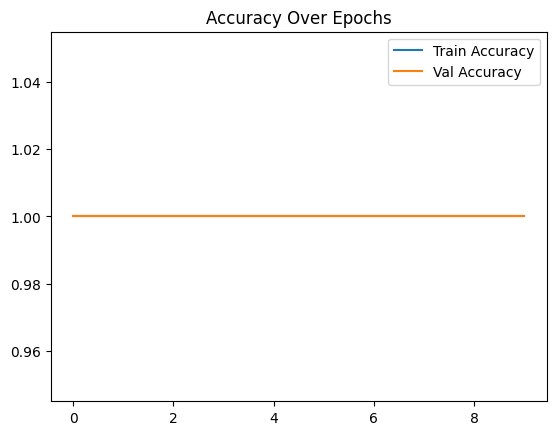

In [37]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [21]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

# Construct the path to the subdirectory containing the class directories
# Assuming the actual dataset is in the first subdirectory listed
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)

    for class_dir in class_dirs:
        class_folder_path = os.path.join(subdirectory_path, class_dir)
        if os.path.isdir(class_folder_path): # Check if the path is a directory
            for img_file in os.listdir(class_folder_path):
                img_path = os.path.join(class_folder_path, img_file)
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not process image {img_path}: {e}")

    # Filter duplicates
    duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
    print("Duplicate image sets found:", len(duplicates))

    # Optional: print the paths of duplicate images
    # for file_hash, file_paths in duplicates.items():
    #     print(f"Hash: {file_hash}")
    #     for file_path in file_paths:
    #         print(f"- {file_path}")
else:
    print("No subdirectories found in the repository path.")

Duplicate image sets found: 89


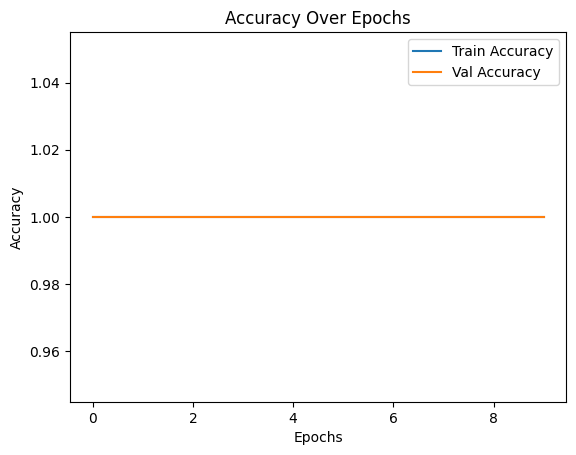

In [38]:
import matplotlib.pyplot as plt

if 'history' in locals():
    # Plot accuracy curves
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    # Optionally, plot loss curves as well
    # plt.plot(history.history['loss'], label='Train Loss')
    # plt.plot(history.history['val_loss'], label='Val Loss')
    # plt.legend()
    # plt.title("Loss Over Epochs")
    # plt.xlabel("Epochs")
    # plt.ylabel("Loss")
    # plt.show()
else:
    print("Model training history not found. Please train the model first.")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

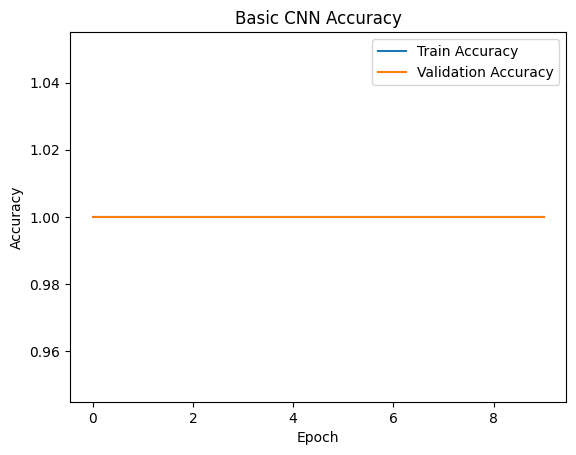

In [41]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator
import os # Import os

# Define parameters (make sure these are defined or accessible)
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
repo_path = "/content/drive/MyDrive/Tree_Species_Dataset" # Ensure repo_path is defined

# Data Generators (re-created within this cell)
sub_dirs = os.listdir(repo_path)
if sub_dirs:
    subdirectory_name = sub_dirs[0]
    subdirectory_path = os.path.join(repo_path, subdirectory_name)
else:
    print("Error: No subdirectories found in the repository path.")
    subdirectory_path = None

train_generator = None
val_generator = None

if subdirectory_path:
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        zoom_range=0.2,
        shear_range=0.2,
        horizontal_flip=True
    )

    train_generator = datagen.flow_from_directory(
        subdirectory_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    val_generator = datagen.flow_from_directory(
        subdirectory_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

if train_generator and val_generator:
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')  # Use train_generator.num_classes
    ])

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    print("Starting model training...")
    history_improved = model.fit(train_generator, validation_data=val_generator, epochs=25)
    print("Training finished.")

    model.save("improved_cnn_model.h5")
    print("✅ Improved CNN model saved as 'improved_cnn_model.h5'")
else:
    print("Model training skipped due to data generator setup failure.")

Found 1260 images belonging to 31 classes.
Found 302 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting model training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 391s 10s/step - accuracy: 0.0701 - loss: 5.3232 - val_accuracy: 0.0364 - val_loss: 5.2923
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 261s 7s/step - accuracy: 0.1198 - loss: 3.2780 - val_accuracy: 0.0331 - val_loss: 9.3731
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 261s 7s/step - accuracy: 0.1343 - loss: 3.1202 - val_accuracy: 0.0331 - val_loss: 10.2363
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 261s 7s/step - accuracy: 0.1316 - loss: 3.1570 - val_accuracy: 0.0430 - val_loss: 11.4711
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 267s 7s/step - accuracy: 0.1627 - loss: 3.0423 - val_accuracy: 0.0430 - val_loss: 11.1748
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 259s 6s/step - accuracy: 0.1690 - loss: 2.9783 - val_accuracy: 0.0662 - val_loss: 9.8891
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 261s 6s/step - accuracy: 0.1510 - loss: 3.1002 - val_accuracy: 0.1159 - val_loss: 10.4855
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 271s 7s/step - accuracy: 0.2094 - loss: 2.8893 - val_accuracy: 0.089

Training finished.
✅ Improved CNN model saved as 'improved_cnn_model.h5'


In [3]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive
